In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
import nltk.collocations as collocations
import seaborn as sns

In [2]:
df = pd.read_parquet("C:/Users/Owner/OneDrive/Desktop/DS_project/covid_sentiment.parquet")


In [3]:
positives = ['Positive']
negatives = ['Negative']

positive_tweets = df[df['covid_sentiment'].isin(positives)]
negative_tweets = df[df['covid_sentiment'].isin(negatives)]

#### Creating text object that is all the tweets together

In [4]:
positive_text = " ".join(tweet for tweet in positive_tweets.text)

negative_text = " ".join(tweet for tweet in negative_tweets.text)

#### Tokenizing, lowering, punctuation and stopword removal

In [5]:
from collections import Counter
nltk_stops = stopwords.words('english')
custom_stops = ['rt', 'https']

stops = nltk_stops + custom_stops

stopwords_dict = Counter(stops)


positive_raw_tokens = nltk.word_tokenize(positive_text)
positive_clean = [token.lower() for token in positive_raw_tokens if token.isalpha()]
positive_clean_no_stops = [token for token in positive_clean if token not in stopwords_dict]

negative_raw_tokens = nltk.word_tokenize(negative_text)
negative_clean = [token.lower() for token in negative_raw_tokens if token.isalpha()]
negative_clean_no_stops = [token for token in negative_clean if token not in stopwords_dict]

#### Frequency distributions

In [10]:
positive_freq_dist = nltk.FreqDist(positive_clean_no_stops)

negative_freq_dist = nltk.FreqDist(negative_clean_no_stops)

#### Explorative Plots

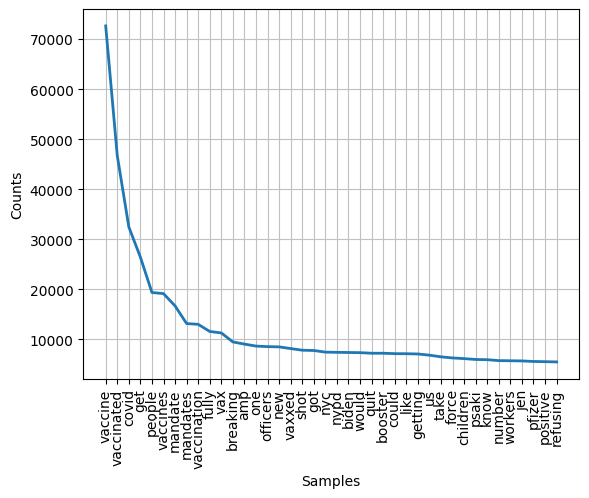

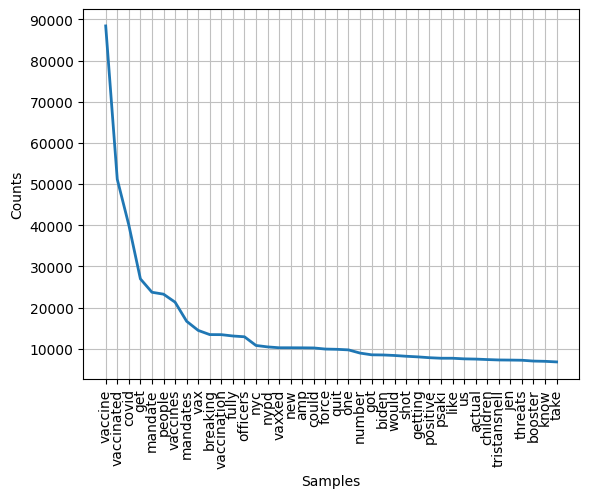

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
positive_freq_dist.plot(40)

negative_freq_dist.plot(40)

#### Prettier Plots

C:\Users\Owner\AppData\Local\Temp\ipykernel_23900\256938732.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pos_plot = sns.barplot(x=positive_fq_pd.index, y=positive_fq_pd.values, ax=ax, palette = colors)


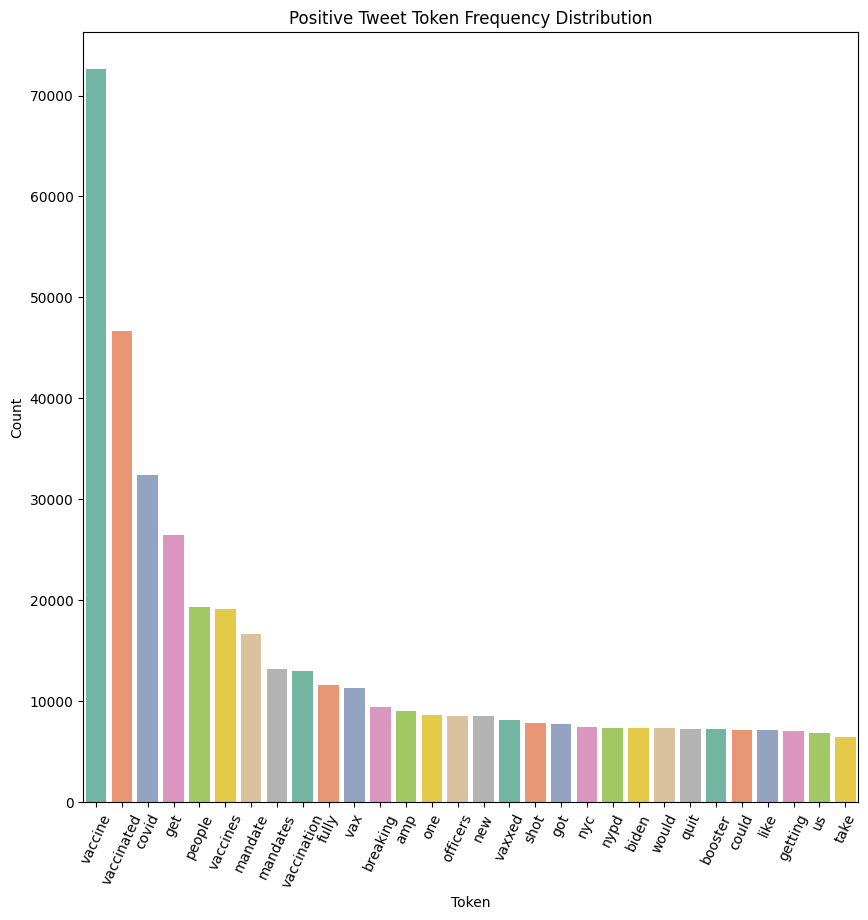

In [11]:
positive_fq_30 = positive_freq_dist.most_common(30)
positive_fq_pd = pd.Series(dict(positive_fq_30))

fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette("Set2", len(positive_fq_pd))

pos_plot = sns.barplot(x=positive_fq_pd.index, y=positive_fq_pd.values, ax=ax, palette = colors)
plt.xticks(rotation=65)
ax.set_title("Positive Tweet Token Frequency Distribution")
ax.set_xlabel("Token")
ax.set_ylabel("Count")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_21004\1584898118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pos_plot = sns.barplot(x=negative_fq_pd.index, y=negative_fq_pd.values, ax=ax, palette = colors)


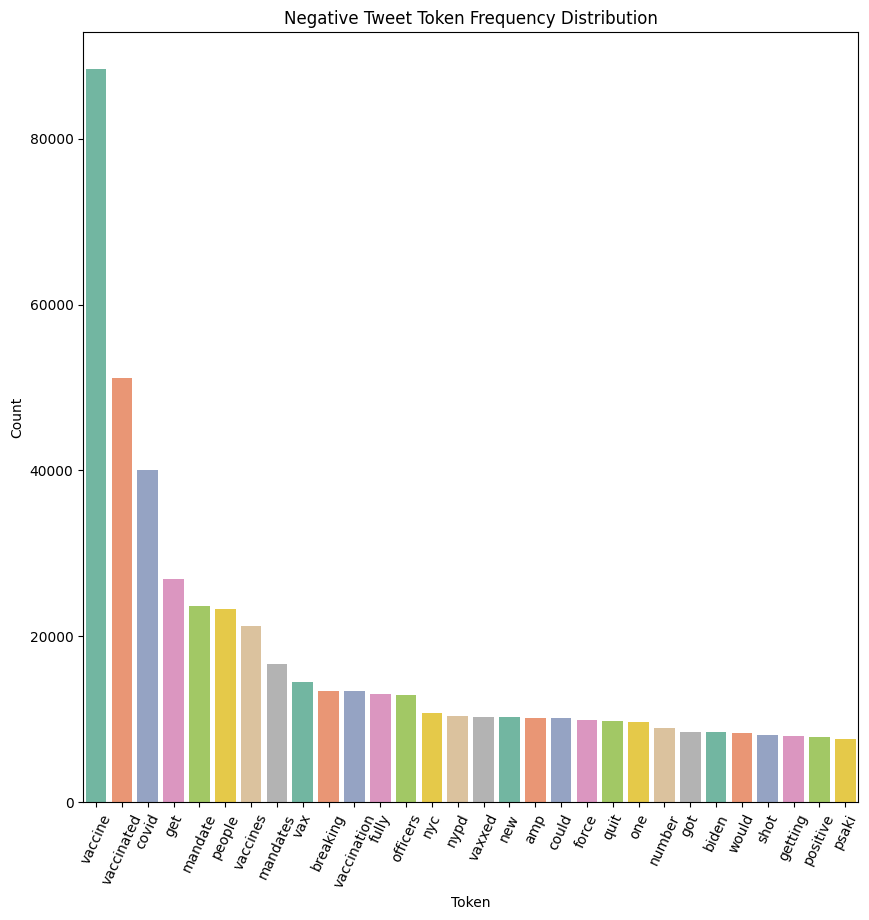

In [62]:
negative_fq_30 = negative_freq_dist.most_common(30)
negative_fq_pd = pd.Series(dict(negative_fq_30))

fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette("Set2", len(negative_fq_pd))

pos_plot = sns.barplot(x=negative_fq_pd.index, y=negative_fq_pd.values, ax=ax, palette = colors)
plt.xticks(rotation=65)
ax.set_title("Negative Tweet Token Frequency Distribution")
ax.set_xlabel("Token")
ax.set_ylabel("Count")
plt.show()

#### Bigrams

C:\Users\Owner\AppData\Local\Temp\ipykernel_23900\4289859704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax, palette = colors)


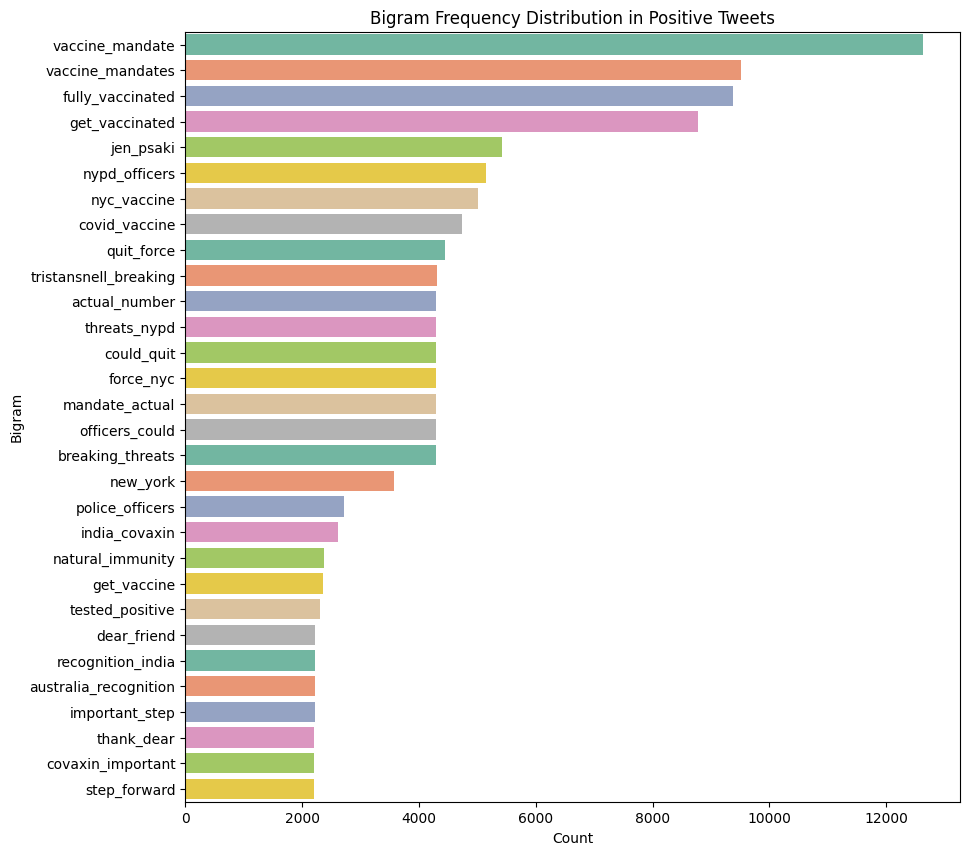

In [13]:
pos_ngrams = bigrams(positive_clean_no_stops)

pos_ngram_fd = FreqDist(pos_ngrams).most_common(30)

pos_ngram_joined = {'_'.join(k):v for k,v in pos_ngram_fd}


ngram_freqdist = pd.Series(pos_ngram_joined)

fig, ax = plt.subplots(figsize=(10,10))

bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax, palette = colors)
ax.set_title('Bigram Frequency Distribution in Positive Tweets')
ax.set_xlabel("Count")
ax.set_ylabel("Bigram")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_23900\1634864057.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax, palette = colors)


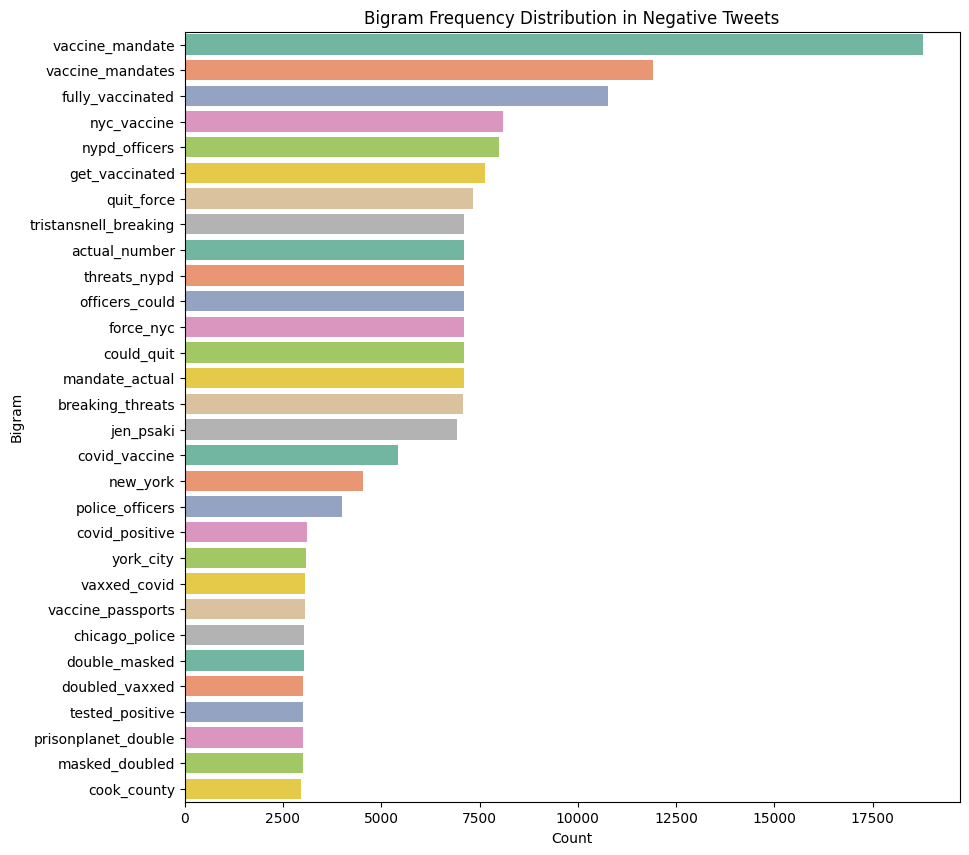

In [14]:
negative_ngrams = bigrams(negative_clean_no_stops)

negative_ngram_fd = FreqDist(negative_ngrams).most_common(30)

negative_ngram_joined = {'_'.join(k):v for k,v in negative_ngram_fd}


ngram_freqdist = pd.Series(negative_ngram_joined)

fig, ax = plt.subplots(figsize=(10,10))

bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax, palette = colors)
ax.set_title('Bigram Frequency Distribution in Negative Tweets')
ax.set_xlabel("Count")
ax.set_ylabel("Bigram")
plt.show()